In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as p
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from random import randint
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ConfusionMatrix
from random  import seed

In [9]:
###Loading a data into a dataframe
data = pd.read_csv('full_data.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [7]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:>

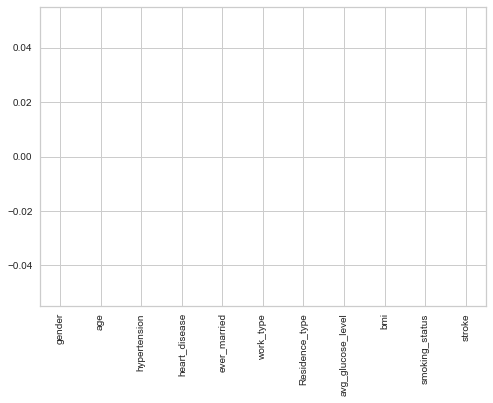

In [71]:
#Clean the data
data.isnull().sum().plot(kind='bar')

In [3]:
str(data)

'      gender   age  hypertension  heart_disease ever_married      work_type  \\\n0       Male  67.0             0              1          Yes        Private   \n1       Male  80.0             0              1          Yes        Private   \n2     Female  49.0             0              0          Yes        Private   \n3     Female  79.0             1              0          Yes  Self-employed   \n4       Male  81.0             0              0          Yes        Private   \n...      ...   ...           ...            ...          ...            ...   \n4976    Male  41.0             0              0           No        Private   \n4977    Male  40.0             0              0          Yes        Private   \n4978  Female  45.0             1              0          Yes       Govt_job   \n4979    Male  40.0             0              0          Yes        Private   \n4980  Female  80.0             1              0          Yes        Private   \n\n     Residence_type  avg_glucose_lev

# Correlation between the variables

<AxesSubplot:>

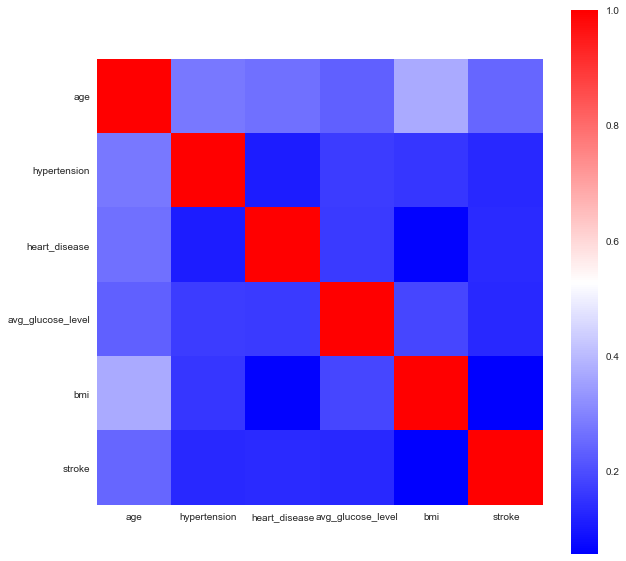

In [5]:
plt.figure(figsize=(10,10))
cor=data.corr()
sns.heatmap(cor,cmap='bwr',square=True)


#plt.figure(figsize=(10,10))
#corr=data.corr()
           
#sns.heatmap(corr,annot = True)
#plt.savefig("Corre.png")

# Data anlysis

<AxesSubplot:xlabel='stroke', ylabel='count'>

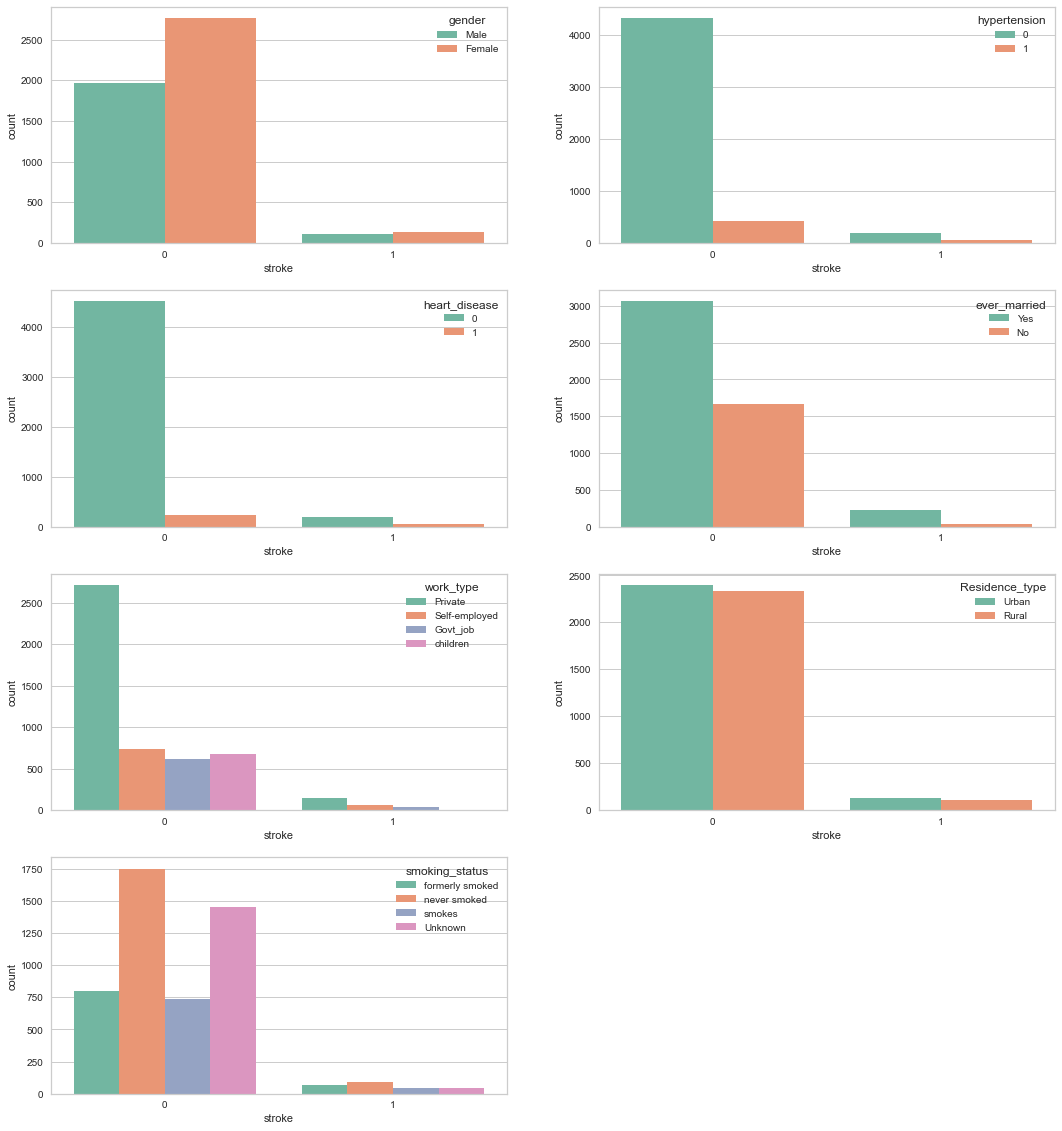

In [73]:
plt.figure(figsize = (18,20))

plt.subplot(4,2,1)
sns.countplot(x = 'stroke', hue= 'gender', palette='Set2', data = data)

plt.subplot(4,2,2)
sns.countplot(x = 'stroke', hue= 'hypertension', palette='Set2', data = data)

plt.subplot(4,2,3)
sns.countplot(x = 'stroke', hue= 'heart_disease', palette='Set2', data = data)

plt.subplot(4,2,4)
sns.countplot(x = 'stroke', hue= 'ever_married', palette='Set2', data = data)

plt.subplot(4,2,5)
sns.countplot(x = 'stroke', hue= 'work_type', palette='Set2', data = data)

plt.subplot(4,2,6)
sns.countplot(x = 'stroke', hue= 'Residence_type', palette='Set2', data = data)

plt.subplot(4,2,7)
sns.countplot(x = 'stroke', hue= 'smoking_status', palette='Set2', data = data)

In [ ]:
"Continuous variables"

C:\Users\pushp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


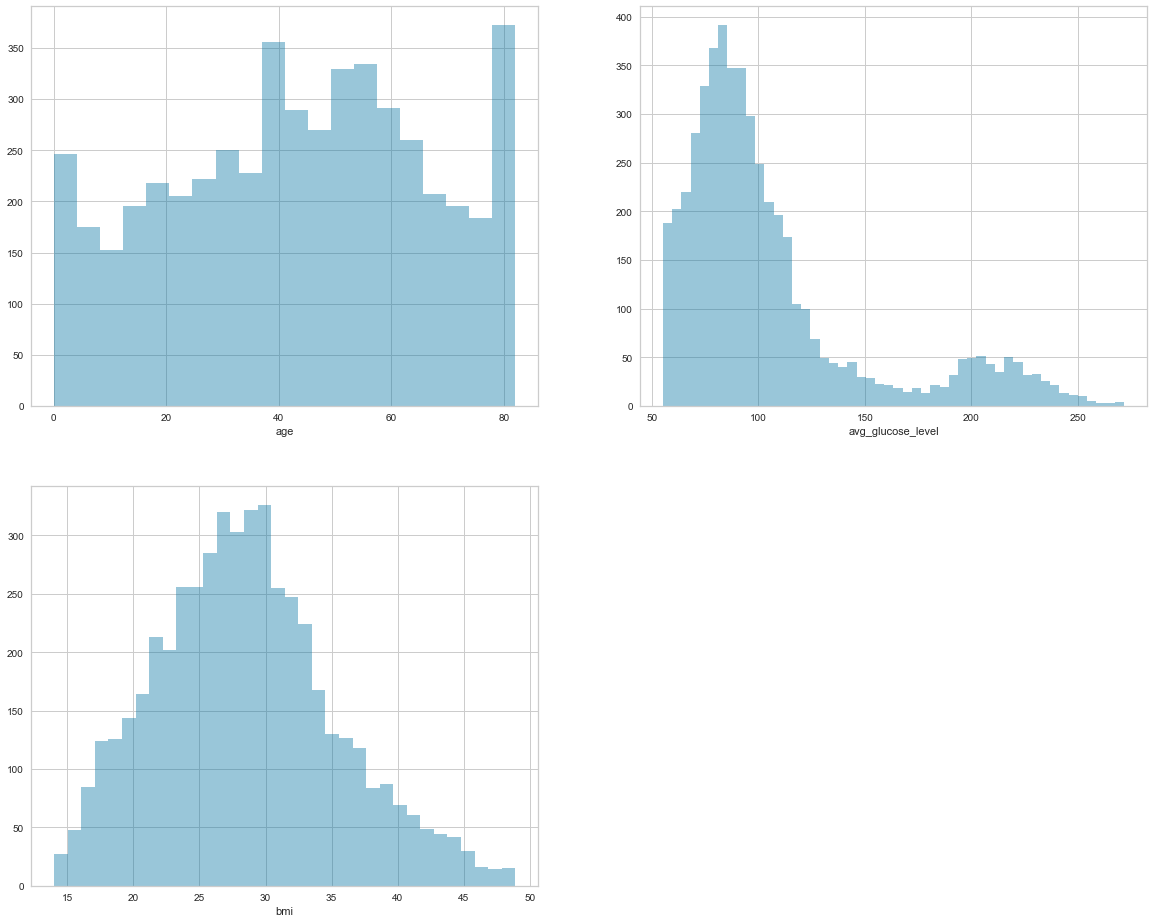

In [6]:
plt.figure(figsize = (20,25))



plt.subplot(3,2,1)
sns.distplot(data.age, kde = False)

plt.subplot(3,2,2)
sns.distplot(data.avg_glucose_level, kde = False)

plt.subplot(3,2,3)
sns.distplot(data.bmi, kde = False)
plt.savefig("con.png")

In [80]:
"Continuous variable comparing with our target variable"

'Continuous variable comparing with our target variable'

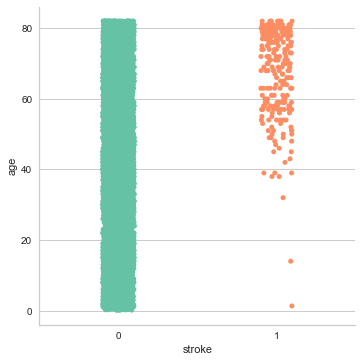

In [8]:
sns.catplot(x = "stroke", y = "age", palette = "Set2", data = data)

In [1]:
sns.catplot(x = "stroke", y = "bmi", palette = "Set2", data = data)

NameError: name 'sns' is not defined

In [ ]:
sns.catplot(x = "stroke", y = "avg_glucose_level", palette = "Set2", data = data)

Text(0, 0.5, 'Count of Patients')

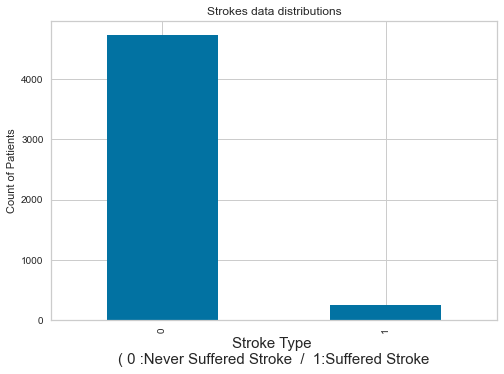

In [74]:
data['stroke'].value_counts().plot(kind='bar')
plt.title('Strokes data distributions')
plt.xlabel('Stroke Type \n( 0 :Never Suffered Stroke  /  1:Suffered Stroke',fontsize=15)
plt.ylabel('Count of Patients')

In [75]:
dataset = pd.get_dummies(data)
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


# Balanced  data

In [76]:
X = dataset.drop('stroke',axis=1)
y = dataset['stroke']

In [77]:
##Apply SMOTE technique
os = SMOTE()
X,y = os.fit_resample(X,y)

Text(0, 0.5, 'Count of Patients')

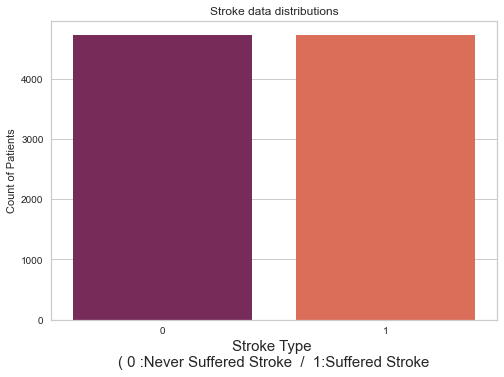

In [78]:
sns.countplot(data=dataset,x=y,palette='rocket')
plt.title('Stroke data distributions')
plt.xlabel('Stroke Type \n( 0 :Never Suffered Stroke  /  1:Suffered Stroke',fontsize=15)
plt.ylabel('Count of Patients')

# After imbalance correlation between the variables

<AxesSubplot:>

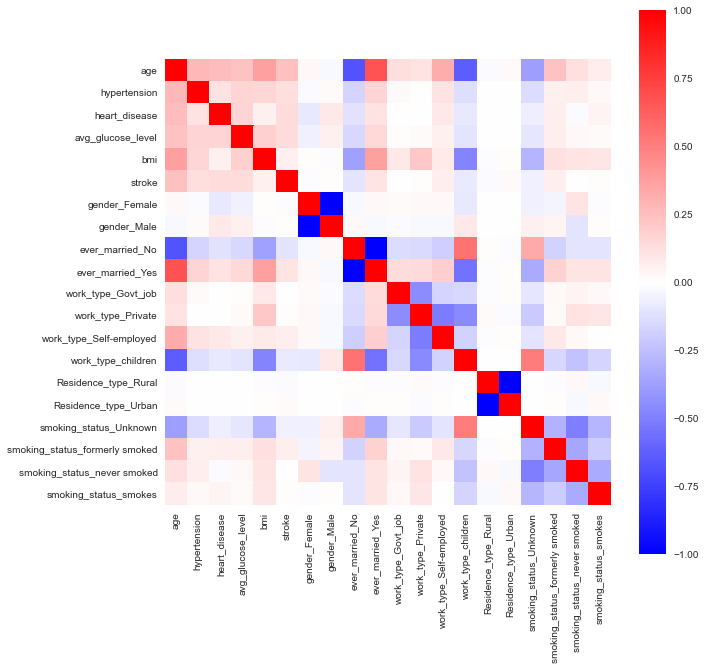

In [38]:
plt.figure(figsize=(10,10))
cor=dataset.corr()
sns.heatmap(cor,cmap='bwr',square=True)

<AxesSubplot:>

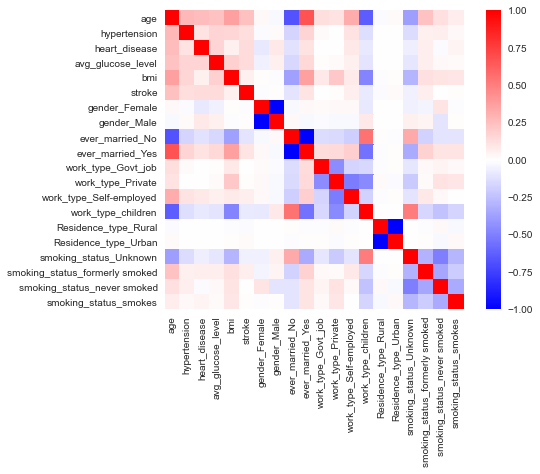

In [39]:
cor=dataset.corr()
sns.heatmap(cor,cmap='bwr',square=True)

# Exploaratory analysis

In [ ]:
Correlation between the variables

<AxesSubplot:>

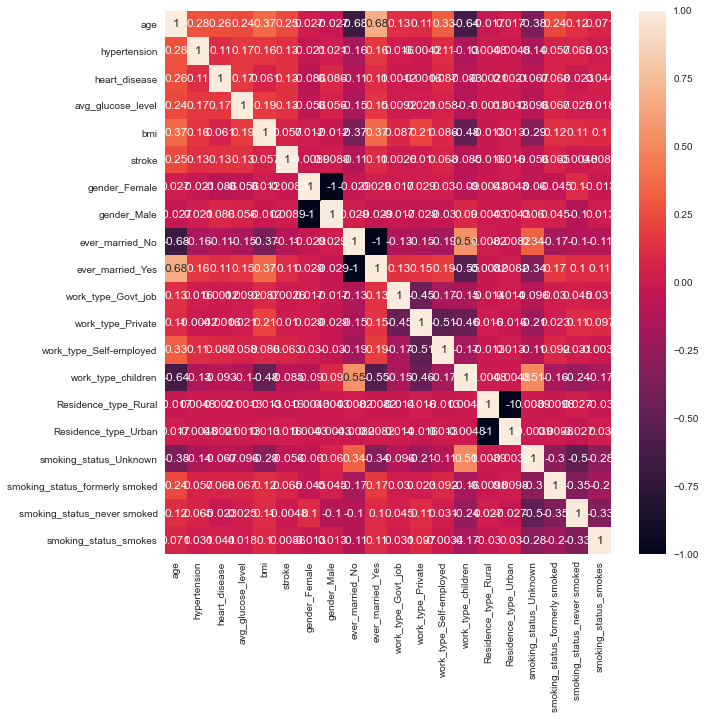

In [37]:
plt.figure(figsize=(10,10))
corr=dataset.corr()
           
sns.heatmap(corr,annot = True)

In [40]:
#to know the shape of the train and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6626, 19)
(6626,)
(2840, 19)
(2840,)


In [41]:
#Scaling X data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
###KNN classifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(accuracy_score(y_test, y_pred))
###Confusion matrix

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9619718309859155
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1428
           1       0.98      0.94      0.96      1412

    accuracy                           0.96      2840
   macro avg       0.96      0.96      0.96      2840
weighted avg       0.96      0.96      0.96      2840



In [64]:
classes=['Low Risk','High-Risk']
model=KNN
classifiers=[
KNeighborsClassifier()]

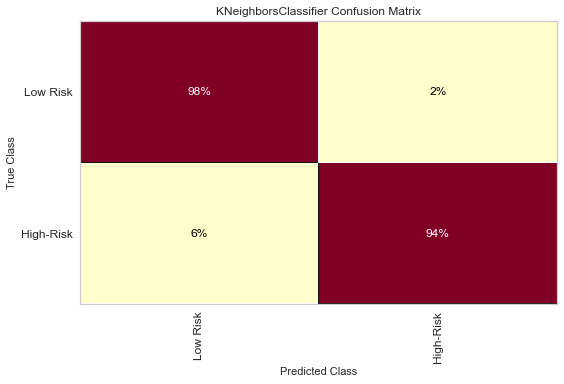

In [65]:
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=stroke,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,stroke)
CM_viz()

# ROC CURVE

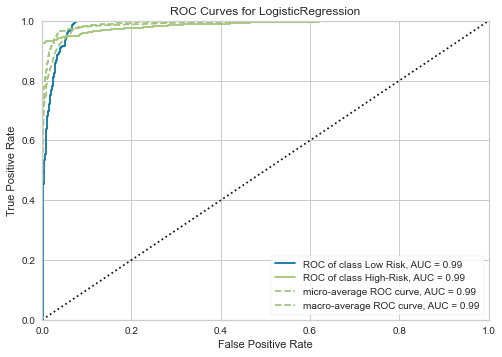

In [50]:
##AUC-ROC curve
def ROC_viz():    
    def ROC(model,stroke):
        visualizer = ROCAUC(model, classes=stroke)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,stroke)
ROC_viz()        

In [ ]:
In the roc curve Micro average and macro average curve same 89% similarly area under the curve of 9 is 89% and 1 is 98%.

In [66]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
predictions1 = LR.predict(X_test)
print(accuracy_score(y_test, predictions1))
#print(confusion_matrix(y_test, predictions1))
print(classification_report(y_test, predictions1))


0.9612676056338029
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1428
           1       1.00      0.93      0.96      1412

    accuracy                           0.96      2840
   macro avg       0.96      0.96      0.96      2840
weighted avg       0.96      0.96      0.96      2840



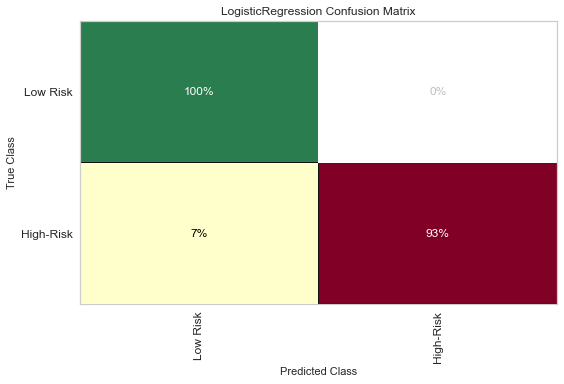

In [67]:
classes=['Low-Risk','High-Risk']
model=LR
classifiers=[
LogisticRegression()]
CM_viz()

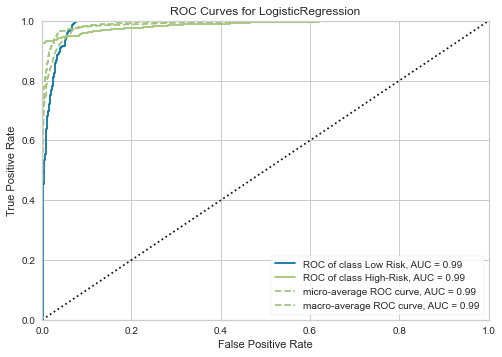

In [53]:
ROC_viz()

In [54]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.972887323943662
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1428
           1       0.99      0.95      0.97      1412

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840



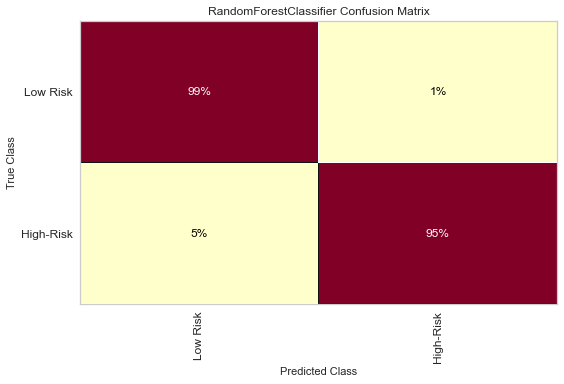

In [55]:
classes=['low_Risk','High-Risk']
model=RF
classifiers=[
RandomForestClassifier()]
CM_viz()

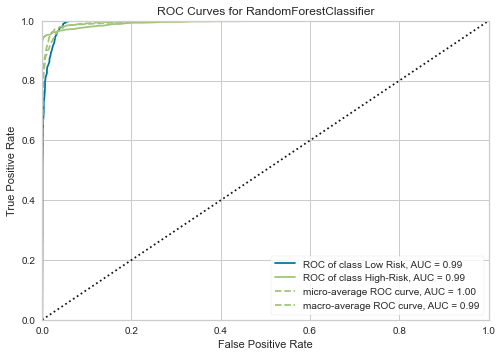

In [56]:
ROC_viz()

In [57]:
tree = DecisionTreeClassifier() # decision tree algorithm
tree.fit(X_train, y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')
y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test, y_pred))


Decision tree has 745 nodes with maximum depth 20.
Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1428
           1       0.92      0.95      0.94      1412

    accuracy                           0.93      2840
   macro avg       0.94      0.93      0.93      2840
weighted avg       0.94      0.93      0.93      2840



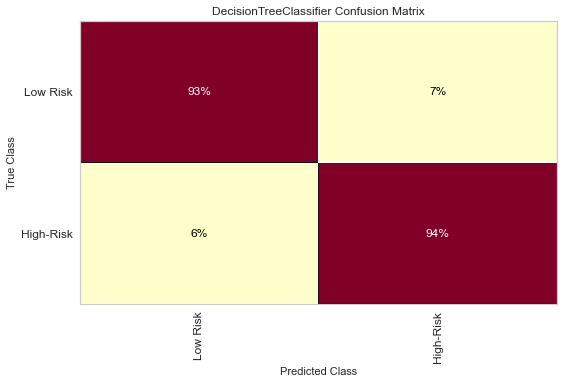

In [62]:
classes=['Low-Risk','High-Risk']
model=tree
classifiers=[
DecisionTreeClassifier()]
CM_viz()


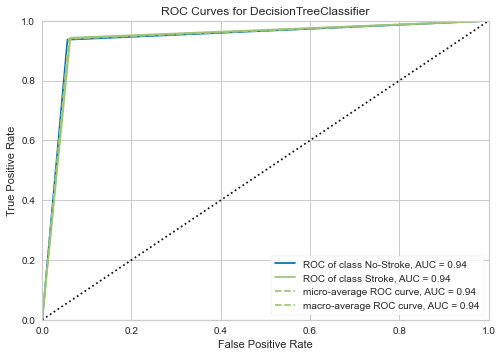

In [71]:
ROC_viz()

In [82]:
from sklearn import svm

clf = svm.SVC()

clf.fit(X_train,y_train)

predicted_labels = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print ("    " + empty_cell,)
    for label in labels:
        print ("%{0}s".format(columnwidth) % label,)
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print ("    %{0}s".format(columnwidth) % label1,)
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print (cell,)
        print

conf = confusion_matrix(y_test, y_pred)

In [83]:
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

print('FP classification accuracy = %f' % accuracy(conf))

FP classification accuracy = 0.961972


In [84]:
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))


 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1428
           1       0.98      0.94      0.96      1412

    accuracy                           0.96      2840
   macro avg       0.96      0.96      0.96      2840
weighted avg       0.96      0.96      0.96      2840


 confussion matrix:
 [[1398   30]
 [  78 1334]]
